<h1>8-1. 프로젝트 1<br> 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!</h1>

<h4>(1) 데이터 가져오기</h4><Br>
- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.<br>
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [54]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np

In [55]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

<h4>(2,3) 모델에 입력할 데이터 X,y 준비하기</h4> <br>
- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.<br>
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.<br>

shape도 뽑아보고 길이도 확인해 볼 것

In [38]:
df_X=diabetes.data
df_y=diabetes.target

# print(df_X.shape)
# print(df_y.shape)

# print(df_X)
# print(df_y)

# print(len(df_X))
# print(len(df_y))

- feature 확인해보기

In [56]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


<h4>(4) train 데이터와 test 데이터로 분리하기</h4>

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# train_test_split 을 사용하여 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

#### - 가중치 W와 b 준비하기

In [59]:
import numpy as np
np.random.seed(31)      # 계속 테스트 결과가 변하여서 난수값을 고정했습니다 

W = np.random.rand(10)
b = np.random.rand()
print("=3")

=3


In [60]:
# W 확인해보기 
W

array([0.28605382, 0.95810557, 0.77031293, 0.98687   , 0.20816546,
       0.13691705, 0.9083738 , 0.06863852, 0.07533272, 0.54353469])

In [61]:
# b 확인해보기
b

0.089399716518068

<h4>(5) 모델 준비하기 </h4> 
<h4>(6) 손실함수 loss 정의하기</h4>

In [43]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("=3")

=3


In [44]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("=3")

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("=3")

=3
=3


<h4>(7) 기울기를 구하는 gradient 함수 구현하기</h4>

In [45]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("=3")

=3


<h4>(8) 하이퍼 파라미터인 학습률 설정하기</h4>

In [49]:
LEARNING_RATE = 0.1

losses = []

# python for문으로 훈련 진행
for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
#     if i % 100 == 0:
print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 3000 : Loss 2898.7540


#### (9,10) 모델 학습 후 Test 데이터에 대한 성능을 확인해주세요

In [51]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2878.654502549036

<h4>(11) x축에는 X 데이터의 첫 번째 컬럼을, <br>
y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.</h4>

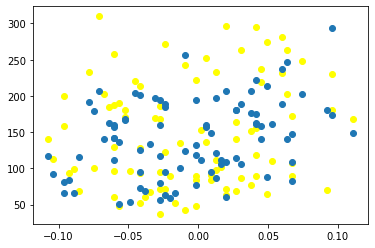

In [53]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], y_test, color="yellow")
plt.scatter(X_test[:, 0], prediction)
plt.show()

<h1>8-2. 프로젝트 2 <Br> 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?</h1>

In [ ]:
# X_columns = ['season',
# 'holiday',
# 'temp',
# 'atemp',
# 'year',
# 'month',
# 'day',
# 'hour',
# 'minute',
# 'second']

### (1) 데이터 가져오기

In [17]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
# train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### (2) datetime 컬럼을 datetime 자료형으로 변환하고 <br> 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [63]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [64]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [69]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

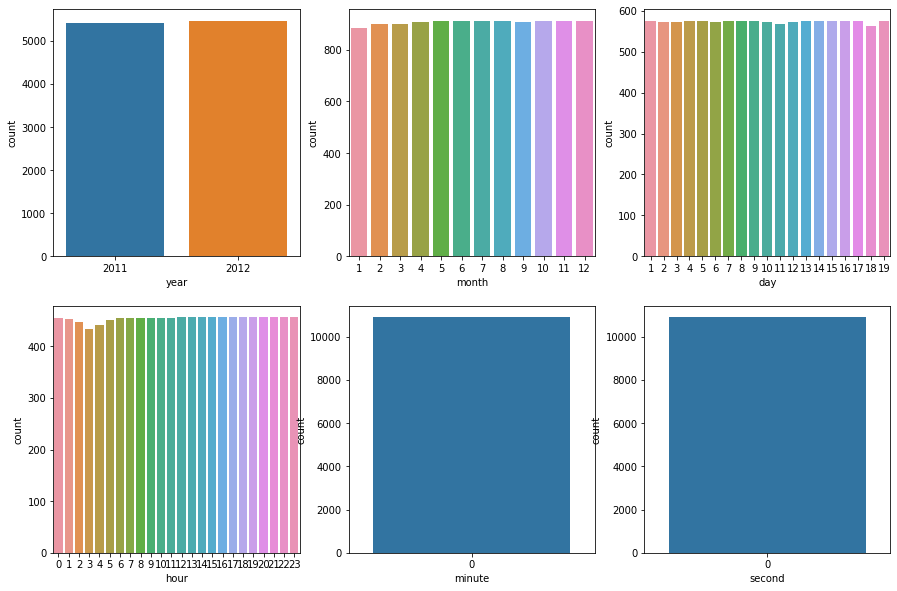

In [72]:
import seaborn as sns 

# figuresize 설정하기
plt.figure(figsize=(15, 10)) 

# 6개의 그래프를 한번에 작성하기 위해 subplot 사용하기
plt.subplot(2, 3, 1)
sns.countplot(data=train, x='year')

plt.subplot(2, 3, 2)
sns.countplot(data=train, x='month')

plt.subplot(2, 3, 3)
sns.countplot(data=train, x='day')

plt.subplot(2, 3, 4)
sns.countplot(data=train, x='hour')

plt.subplot(2, 3, 5)
sns.countplot(data=train, x='minute')

plt.subplot(2, 3, 6)
sns.countplot(data=train, x='second')

plt.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다<br> 
데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.<br> 
만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.<br> 
ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?<br>

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [74]:
# 데이터 컬럼에서 casual 과 registered는 컬럼에서 빼고 출력 
train_X = train[['season', 
                 'holiday', 
                 'workingday', 
                 'weather', 
                 'temp', 
                 'atemp', 
                 'humidity', 
                 'windspeed',
                 'year', 
                 'month', 
                 'day', 
                 'hour',
                 'minute', 
                 'second']].values

train_y = train['count'].values

train_X, train_y, train_target, test_target = train_test_split(train_X, train_y,  test_size=0.2)

#### (5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [75]:
model = LinearRegression()
model.fit(train_X, train_target)

LinearRegression()

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [83]:
# 예측값 출력하기
predictions = model.predict(train_y) 
# predictions

# 손실함수 값 계산하기 (mse값과 함께 rmse 값도 계산하기)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def RMSE(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse

print(f"RMSE점수 : {RMSE(test_target, predictions)}")
print(f"MSE점수 : {MSE(test_target, predictions)}")

RMSE점수 : 142.81869714916132
MSE점수 : 20397.18025538386


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

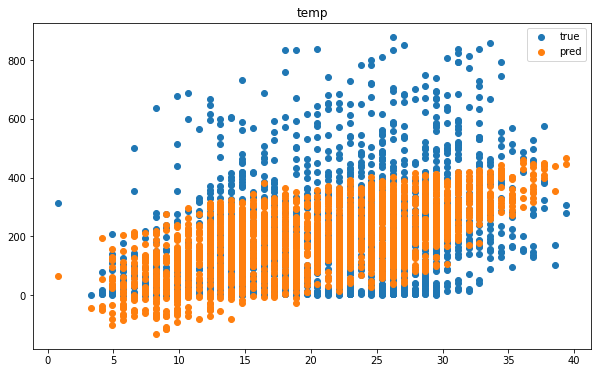

In [86]:
# temp와 humidity 중 temp 데이터를 시각화 해보기  
# x, y 
plt.figure(figsize=(10,6))

# 여기서 temp가 X_train 지정하는 부분에서 5번째 인덱스에 있기 때문에 :,4로 설정 
plt.scatter(train_y[:,4], test_target, label="true")
plt.scatter(train_y[:,4], predictions, label="pred")
plt.title("temp")
plt.legend()
plt.show()


> <h3>회고록</h3> 
---
**이번 프로젝트를 진행하면서 어려웠던 점** <br>
짧은 시간 내에 가중치 w,b를 추측하고 기울기를 뽑고 훈련셋을 설정하여 로스값을 계산하는 부분들이 한 두번만에 바로 이루어지지 않아서 조금 힘들었습니다
---
**이번 프로젝트에서 학습한 내용** <br>
사이킷런 라이브러를 활용하여 데이터를 예측하고 시각화 하는 방법  <br>
수학 공식을(미분,적분) 모르면 공식을 전혀 적용할 수 없을 줄 알았는데 좋은 라이브러리를 잘 활용할 수 있다면 충분히 가능하다는 점에서 용기가 아주 조금 생겼다 🥹
---
**알아낸 점이나 모호한 점** <br>
시각화 한 데이터들이 극명하게 차이가 나지 않는 한 한 눈에 데이터를 분석할 수 있는 상태가 아니라서 조금 아쉽다